In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import zscore
from windrose import WindroseAxes

In [22]:
df = pd.read_csv("../data/togo-dapaong_qc.csv") 

In [23]:
df.sample(5)

Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
274163  2022-05-03 09:24  591.6  218.2  398.3  544.0  537.1  30.4  65.8  3.8   
20565   2021-11-08 06:46  126.0  241.9   73.9  130.1  119.4  24.9  81.9  2.4   
520905  2022-10-21 17:46   -3.1    0.0    0.8    1.7    1.7  30.0  53.5  0.3   
331423  2022-06-12 03:44   -1.0    0.0    0.0    0.0    0.0  23.1  91.3  0.4   
128163  2022-01-22 00:04   -3.5    0.0    0.0    0.0    0.0  20.3  17.8  2.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
274163     4.6      0.6  258.2     12.0  977         0            0.0   45.1   
20565      2.7      0.3  240.6      6.8  974         0            0.0   28.8   
520905     1.1      0.5   65.0      1.7  975         0            0.0   28.3   
331423     0.7      0.5  198.3      5.0  977         0            0.0   23.1   
128163     2.9      0.5   63.6     16.4  979         0            0.0   18.9   

        TModB  Comments  
274163   54.2       NaN  
20565    28.2       NaN  
520905   27.9       NaN  
331423   22.8       NaN  
128163   18.5       NaN

In [24]:
# To look at the information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [25]:
# show some stats about the dataframe
df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

In [26]:
# To get the count of null values in each column
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [27]:
# To get the percentage of null values in each column and filter columns with more than 5% null values
null_percent = df.isna().mean() * 100
cols_over_5pct_nulls = null_percent[null_percent > 5].index.tolist()
print(cols_over_5pct_nulls)

['Comments']


In [28]:
# drop the comments column cuz it has 100% null values
df.drop(columns=['Comments'], inplace=True)

In [29]:
# Check for incorrect entries(negative values) in main columns and list them
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
negative_counts = df[columns_to_check].lt(0).sum()
print("Number of negative values per column:\n", negative_counts[negative_counts > 0])

Number of negative values per column:
 GHI    257385
dtype: int64


In [30]:
df[['GHI', 'DNI', 'DHI']] = df[['GHI', 'DNI', 'DHI']].clip(lower=0)

In [31]:
# function used to detect outliers using Z-score method
# It calculates the Z-score for each value in the specified column and identifies values that exceed the given threshold.
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column].dropna())
    outlier_indices = df[column].dropna().index[abs(z_scores) > threshold]
    return df.loc[outlier_indices]

In [32]:
# impute outliers with median and flag them as outliers
def impute_outliers_with_median(df, column):
    outliers = detect_outliers_zscore(df, column)
    median = df[column].median()
    
    flag_col = 'outlier'
    df[flag_col] = False
    df.loc[outliers.index, flag_col] = True
    
    df.loc[outliers.index, column] = median


In [33]:
# Detect, impute and flag outliers in the specified columns 
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in columns_to_check:
    impute_outliers_with_median(df, col)


In [34]:
df.to_csv("../data/cleaned-data/togo-dapaong_qc_clean.csv", index=False)

In [35]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

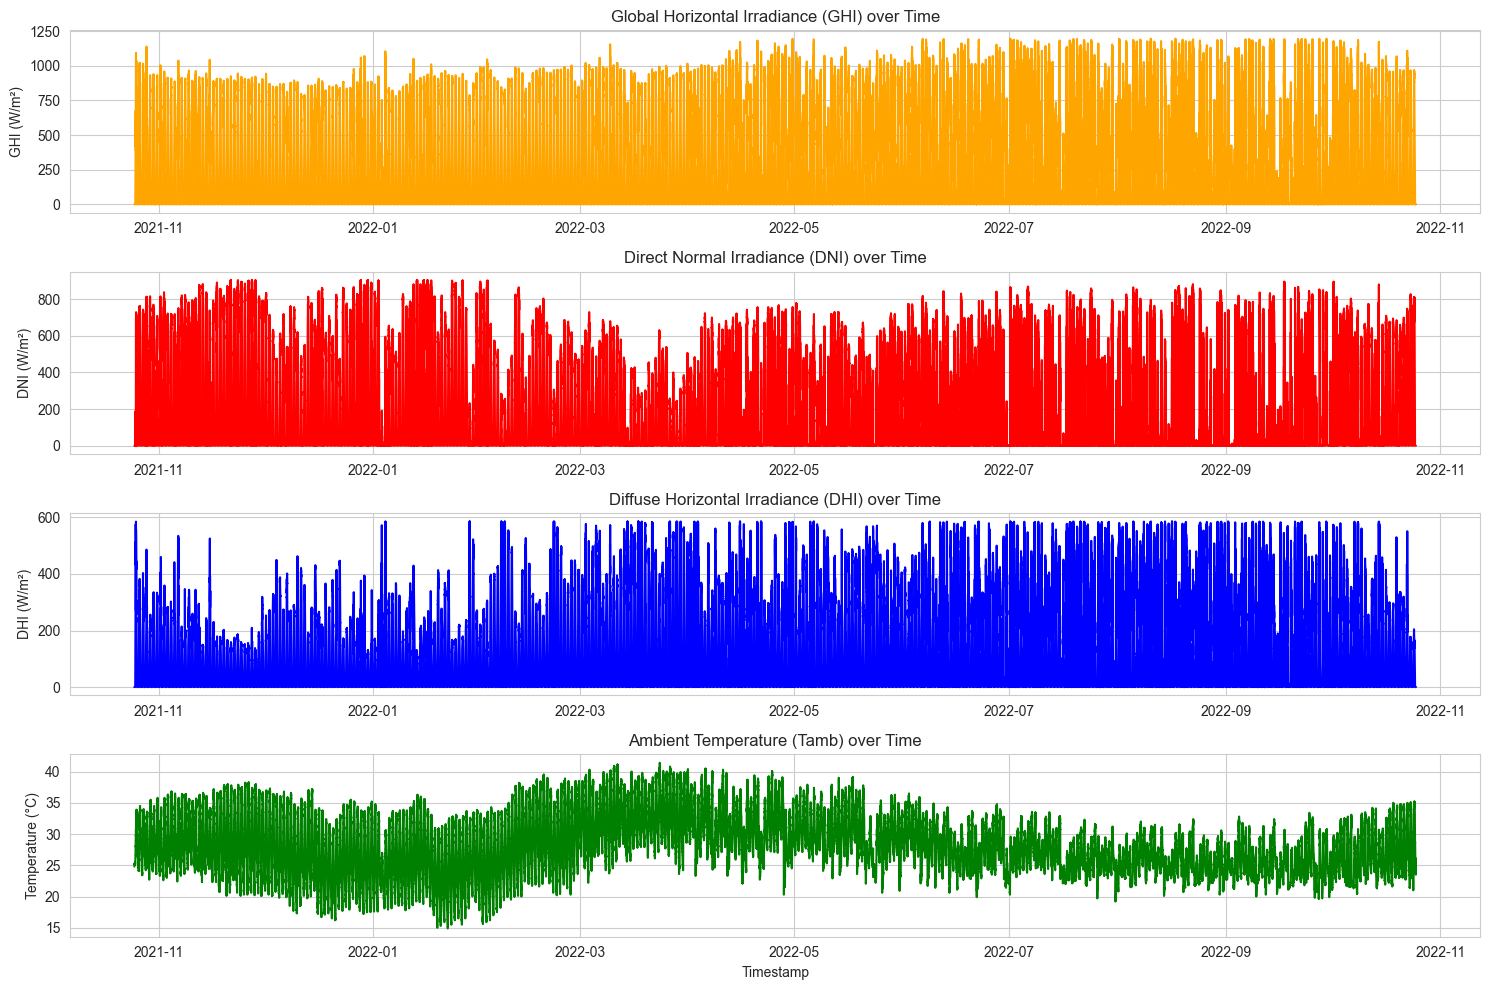

In [36]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Plot GHI
plt.subplot(4, 1, 1)
sns.lineplot(x='Timestamp', y='GHI', data=df, color='orange')
plt.title('Global Horizontal Irradiance (GHI) over Time')
plt.xlabel('')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(4, 1, 2)
sns.lineplot(x='Timestamp', y='DNI', data=df, color='red')
plt.title('Direct Normal Irradiance (DNI) over Time')
plt.xlabel('')
plt.ylabel('DNI (W/m²)')

# Plot DHI
plt.subplot(4, 1, 3)
sns.lineplot(x='Timestamp', y='DHI', data=df, color='blue')
plt.title('Diffuse Horizontal Irradiance (DHI) over Time')
plt.xlabel('')
plt.ylabel('DHI (W/m²)')

# Plot Ambient Temperature (Tamb)
plt.subplot(4, 1, 4)
sns.lineplot(x='Timestamp', y='Tamb', data=df, color='green')
plt.title('Ambient Temperature (Tamb) over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

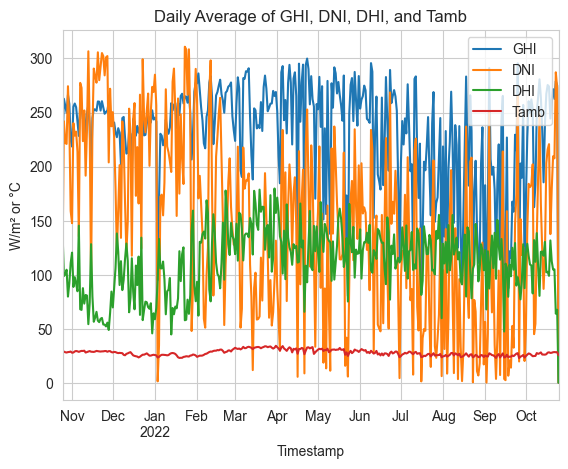

In [21]:
daily_avg = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()
daily_avg.plot()
plt.title('Daily Average of GHI, DNI, DHI, and Tamb')
plt.ylabel('W/m² or °C')
plt.grid(True)
plt.show()

C:\Users\mesay\AppData\Local\Temp\ipykernel_8048\808198780.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample("M").mean()


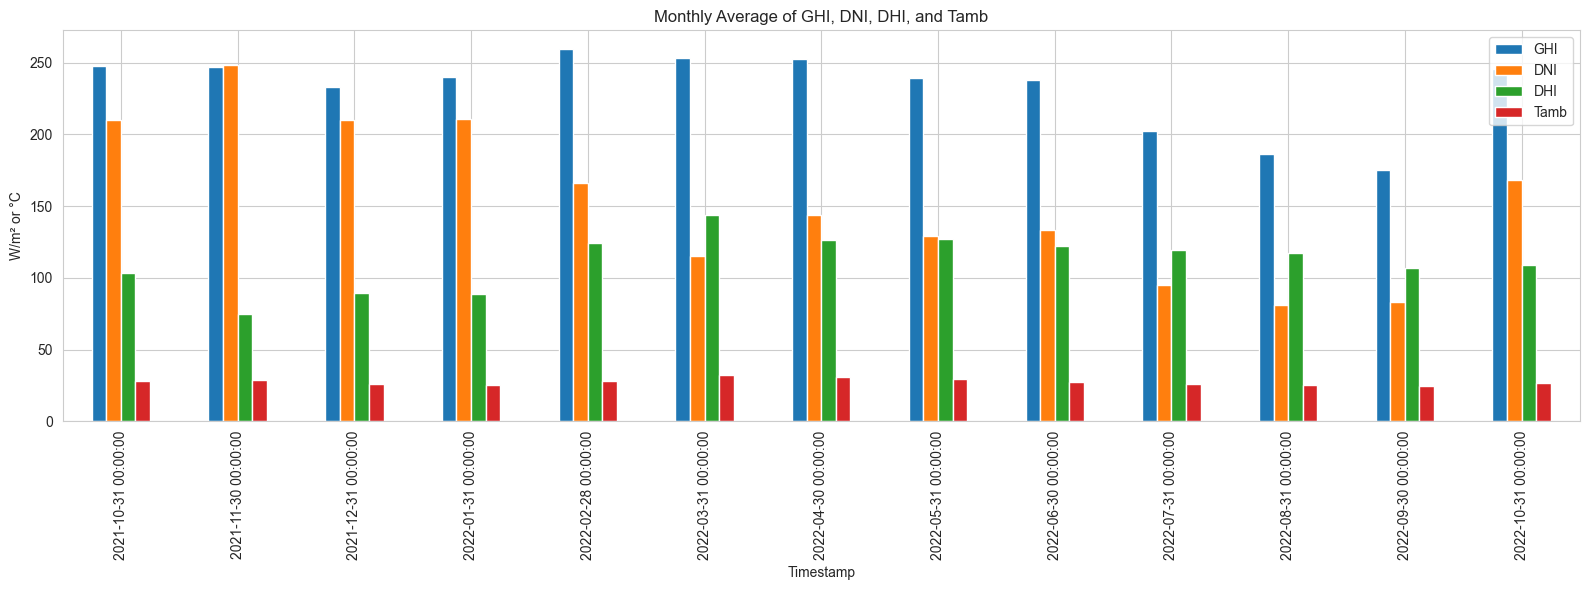

In [22]:
monthly_avg = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample("M").mean()
monthly_avg.plot(kind='bar', figsize=(16, 6))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.ylabel('W/m² or °C')
plt.grid(True)
plt.tight_layout()
plt.show()


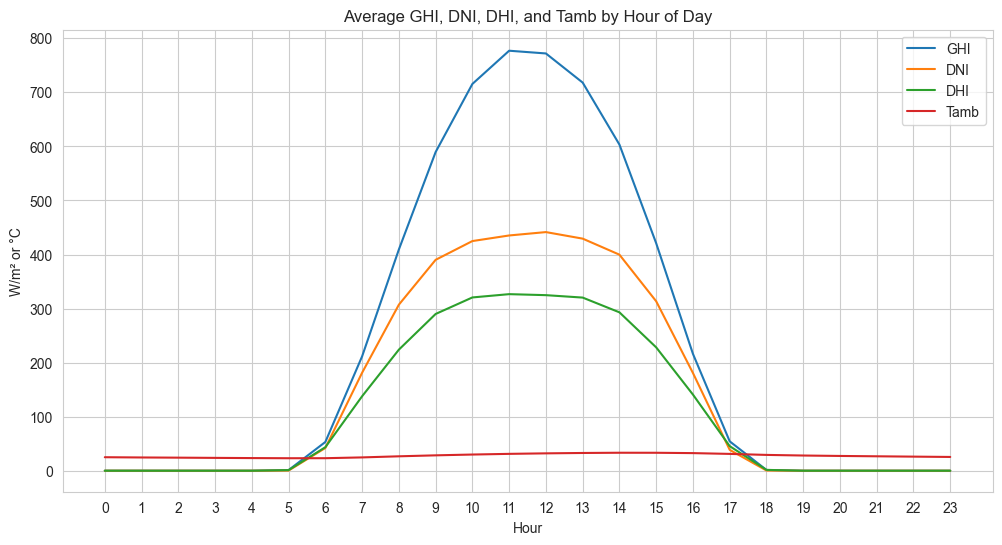

In [23]:
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
hourly_avg.plot(figsize=(12, 6))
plt.title('Average GHI, DNI, DHI, and Tamb by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('W/m² or °C')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

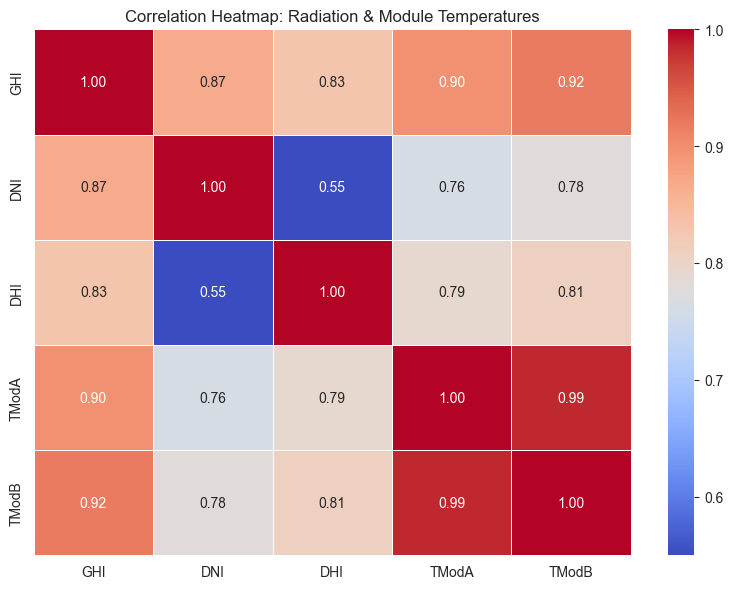

In [24]:
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Radiation & Module Temperatures')
plt.tight_layout()
plt.show()

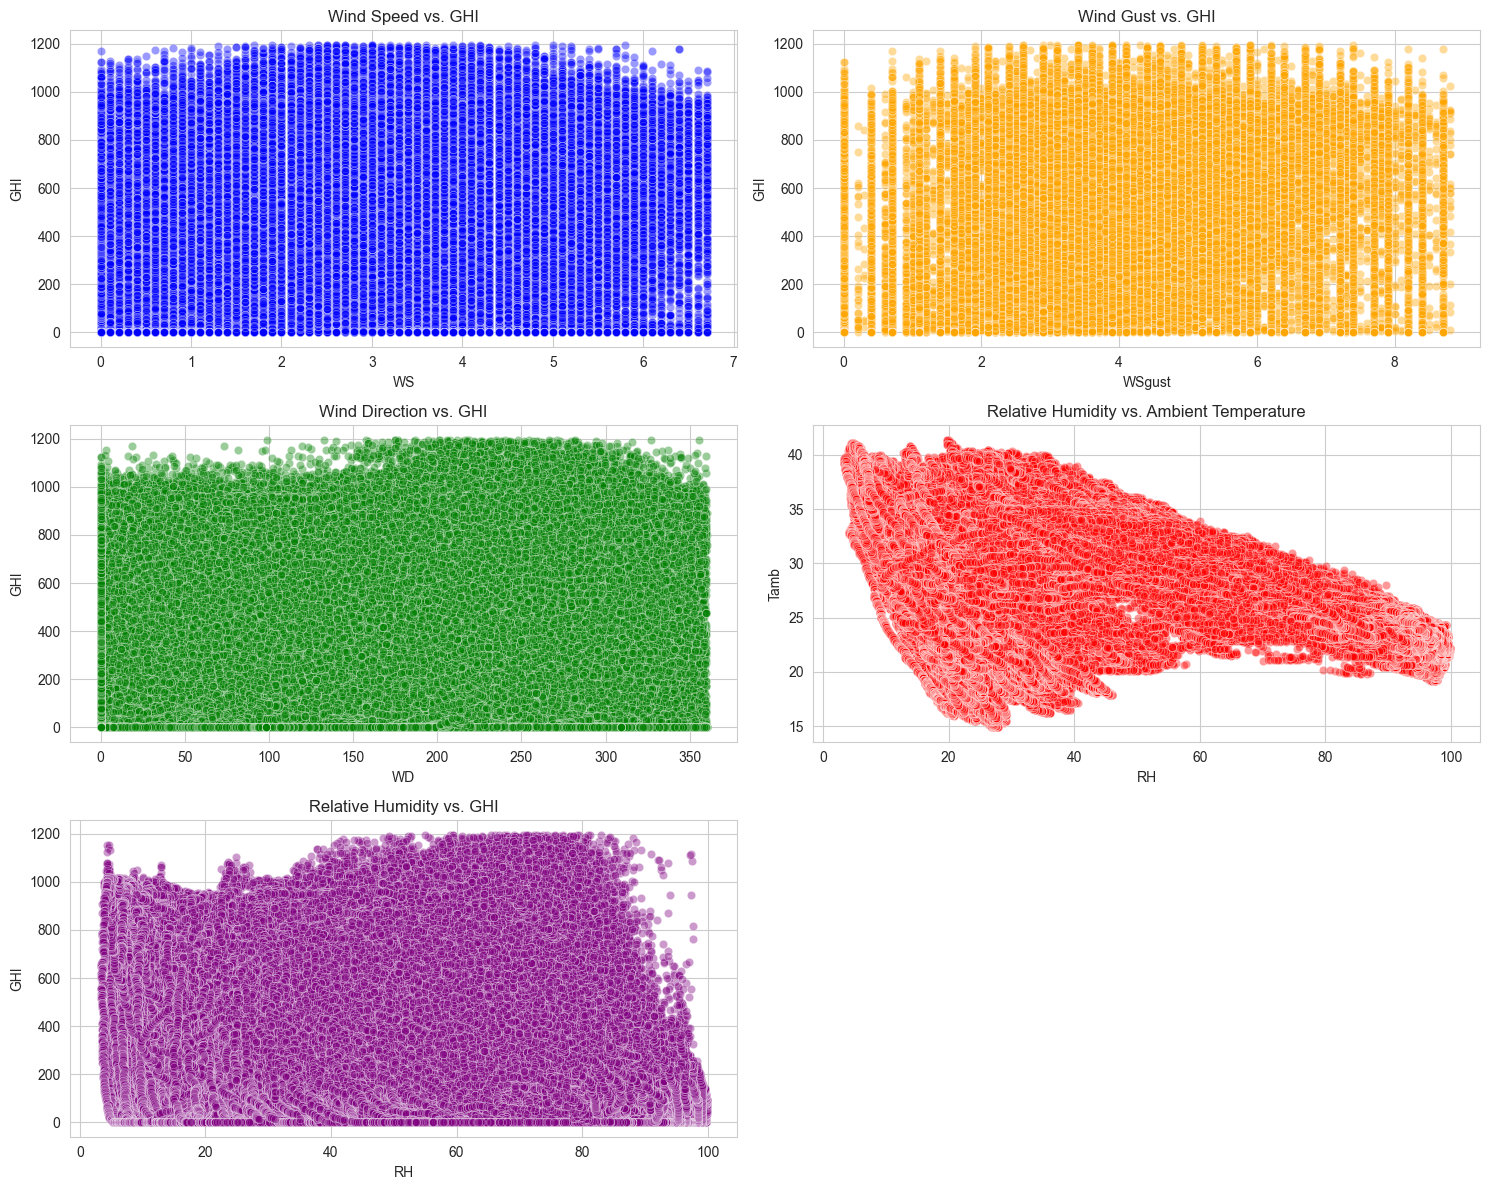

In [25]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI

sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# 1. WS vs GHI
plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x='WS', y='GHI', alpha=0.4, color='blue')
plt.title('Wind Speed vs. GHI')

# 2. WSgust vs GHI
plt.subplot(3, 2, 2)
sns.scatterplot(data=df, x='WSgust', y='GHI', alpha=0.4, color='orange')
plt.title('Wind Gust vs. GHI')

# 3. WD vs GHI
plt.subplot(3, 2, 3)
sns.scatterplot(data=df, x='WD', y='GHI', alpha=0.4, color='green')
plt.title('Wind Direction vs. GHI')

# 4. RH vs Tamb
plt.subplot(3, 2, 4)
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.4, color='red')
plt.title('Relative Humidity vs. Ambient Temperature')

# 5. RH vs GHI
plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.4, color='purple')
plt.title('Relative Humidity vs. GHI')

plt.tight_layout()
plt.show()

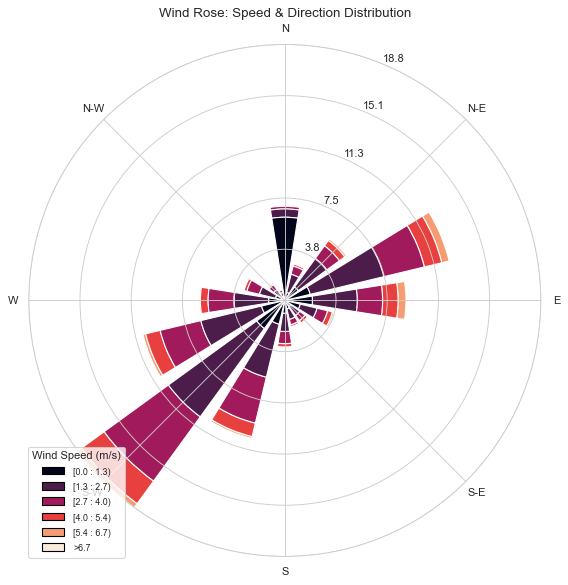

In [26]:
# Wind & Distribution Analysis

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title="Wind Speed (m/s)")
plt.title('Wind Rose: Speed & Direction Distribution')
plt.show()

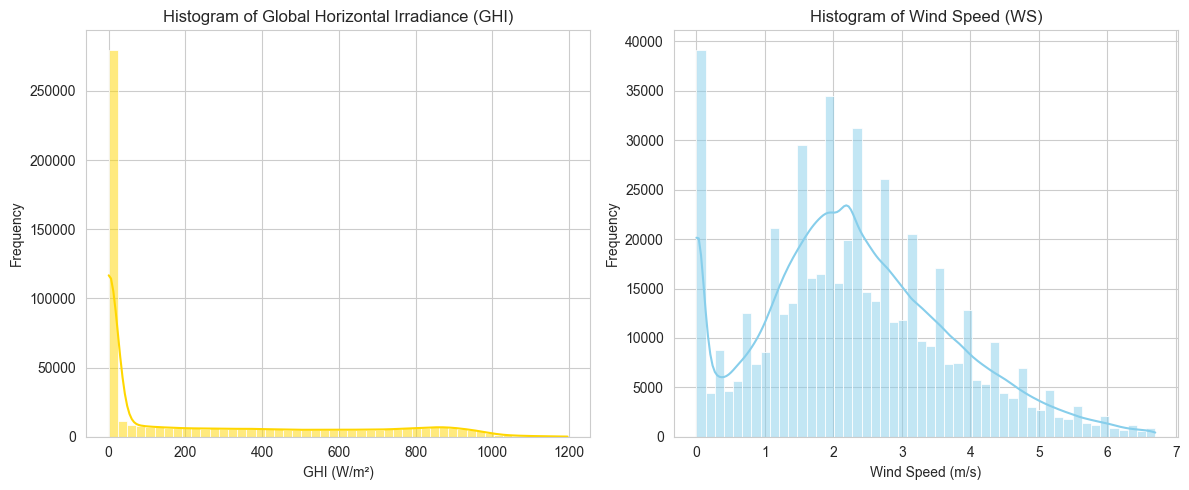

In [27]:
# Histograms for GHI and one other variable (e.g. WS).
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'].dropna(), bins=50, kde=True, color='gold')
plt.title('Histogram of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(1, 2, 2)
sns.histplot(df['WS'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

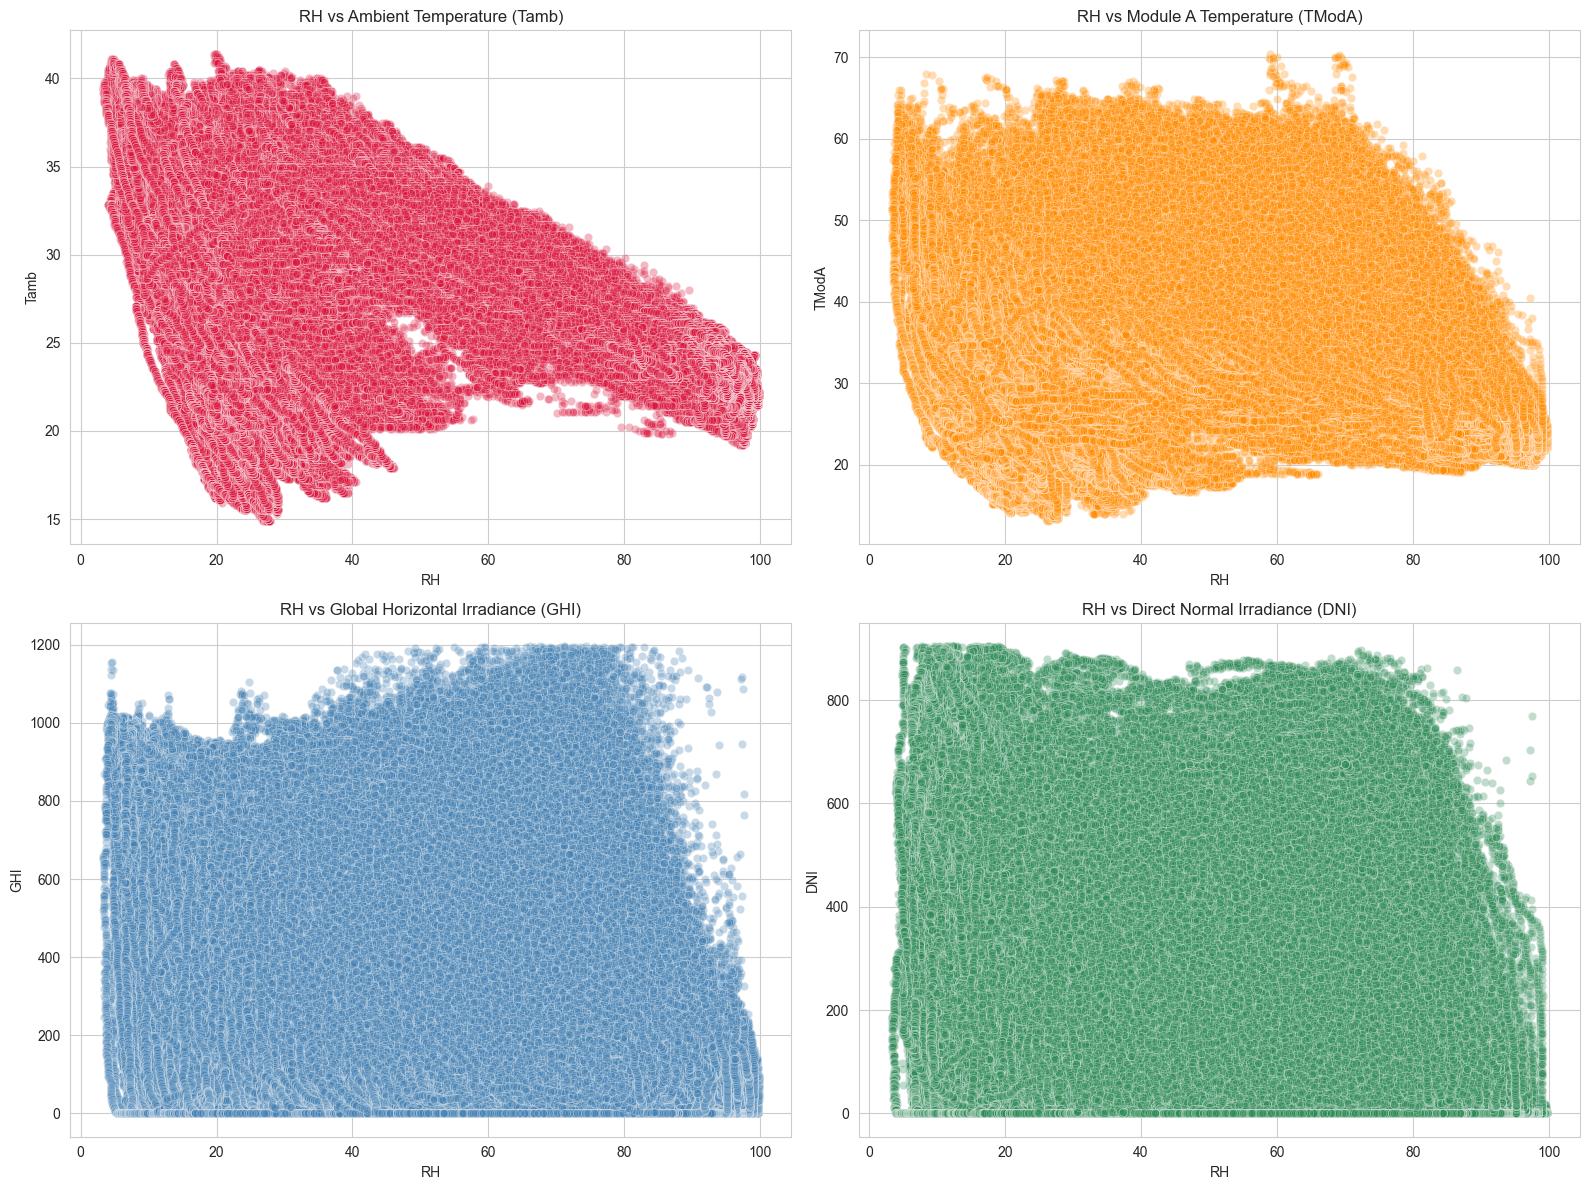

In [28]:
# Temperature Analysis
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# RH vs Tamb
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.3, color='crimson')
plt.title('RH vs Ambient Temperature (Tamb)')

# RH vs TModA
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='RH', y='TModA', alpha=0.3, color='darkorange')
plt.title('RH vs Module A Temperature (TModA)')

# RH vs GHI
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.3, color='steelblue')
plt.title('RH vs Global Horizontal Irradiance (GHI)')

# RH vs DNI
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='RH', y='DNI', alpha=0.3, color='seagreen')
plt.title('RH vs Direct Normal Irradiance (DNI)')

plt.tight_layout()
plt.show()


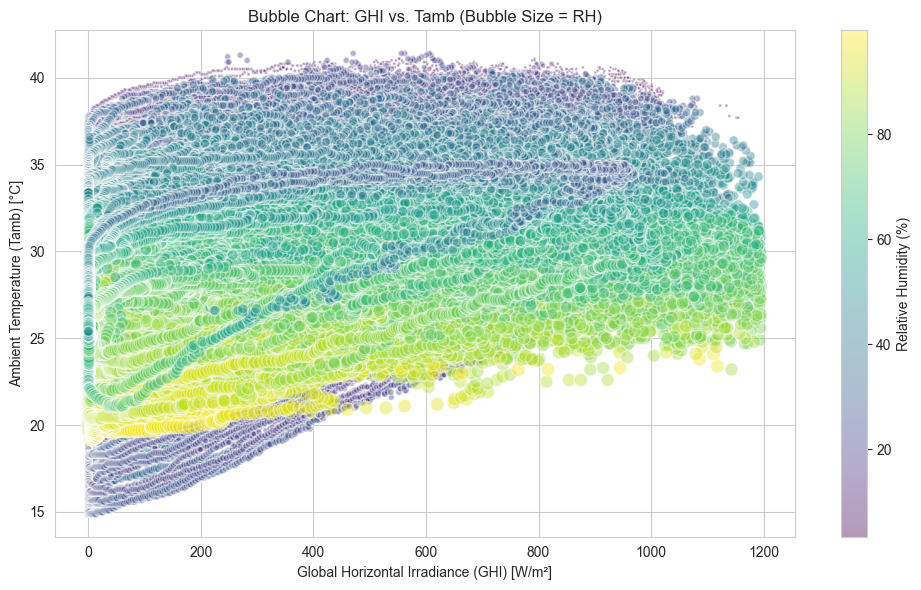

In [29]:
# Bubble Chart: GHI vs Tamb 
plt.figure(figsize=(10, 6))
plt.scatter(
    df['GHI'],
    df['Tamb'],
    s=df['RH'],       
    c=df['RH'],       
    cmap='viridis',
    alpha=0.4,
    edgecolors='w'
)

plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()